In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
d = np.array([[1.2,0.8], [-0.6,-1.3], [-0.8, 0.2], [0.2,0.3]])
data = pd.DataFrame(d, columns=["X", "Y"], index=["A", "B", "C", "D"])
data

,X,Y
A,1.2,0.8
B,-0.6,-1.3
C,-0.8,0.2
D,0.2,0.3


In [178]:
x = [1.2, -0.6, -0.8, 0.2]
y = [0.8, -1.3, 0.2, 0.3]

data = list(zip(x,y))
print(data)

[(1.2, 0.8), (-0.6, -1.3), (-0.8, 0.2), (0.2, 0.3)]


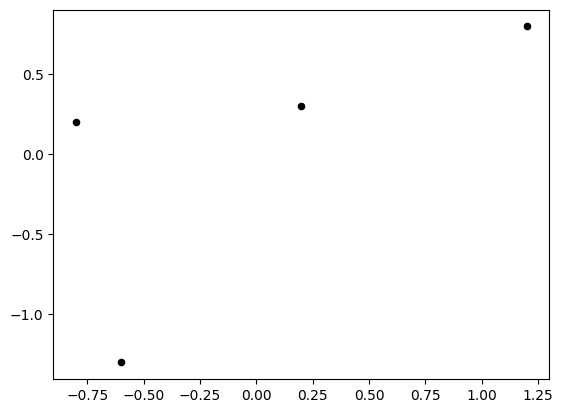

In [91]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], s = 20, c= 'k')


In [85]:
def initiate_centroids(k, dset):
    centroids_local = dset.sample(k)
    return centroids_local

k = 2
df = data[['X','Y']]
centroids = initiate_centroids(k,df)
centroids


,X,Y
C,-0.8,0.2
B,-0.6,-1.3


In [92]:
def update_cluster_mean(cluster):
    centroid = cluster[['X','Y']].mean()
    return centroid.to_numpy()

In [93]:
# Berechnung der init_Clusterschwerpunkte
C1_init = data.iloc[[0,2]]
C1 = update_cluster_mean(C1_init)
C2_init = data.iloc[[1,3]]
C2 = update_cluster_mean(C2_init)
# axis = 0 := rows
#axis = 1 := columns
#init_centroids = pd.concat([C1, C2], axis=1) # Add to new columns
init_centroids = np.stack((C1, C2), axis=0)
init_centroids

array([[ 0.2,  0.5],
       [-0.2, -0.5]])

In [98]:
m, n= data.shape
n_iter = 100
K= 2

In [97]:
# Koventioneller Weg
# def euclidean(a, b):
#     return np.sqrt(np.sum((a - b)**2))


In [102]:
# Entscheiden, welcher Datenpunkt zu welchen Cluster geht
# def assign_cluster(X, init_cen, k_cluster):
#     #cluster = np.array()
#     cluster = []
#     for i in range(len(X)):
#         #euc_dist = np.array()
#         euc_dist = []
#         for j in range(k_cluster):
#             euc_dist.append(np.linalg.norm(np.subtract(X.iloc[i], init_cen[j])))
#         min_dist_index = np.argmin(euc_dist)
#         cluster.append(min_dist_index)
#     return np.asarray(cluster)

In [103]:
# t = assign_cluster(data, init_centroids, K)
# t

array([0, 1, 1, 0], dtype=int64)

In [114]:
# def update_centroids(X, clusters, k_cluster):
#     centroid = []
#     for i in range(k_cluster):
#         temp = []
#         for j in range(len(X)):
#             if clusters[j] == i:
#                 temp.append(X.iloc[j])
#         # X     1.2   0.8
#         # Y     0.2   0.3
#         # Name  A     B
#         centroid.append(np.mean(temp,axis=0))
#     return np.asarray(centroid)


In [115]:
# f = update_centroids(data, t, K)
# f

array([[ 0.7 ,  0.55],
       [-0.7 , -0.55]])

In [145]:
# Mit sklearn Packet
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init=init_centroids, n_init=1)

data_1_km = kmeans.fit_predict(data)
data_1_km

array([0, 1, 1, 0])

C:\Users\Hanny Nguyen\AppData\Local\Temp\ipykernel_21192\161505079.py:19: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


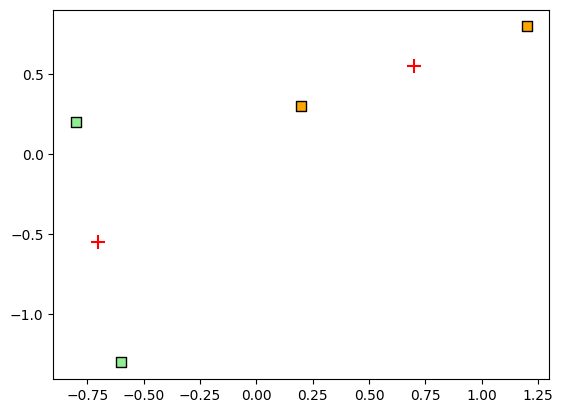

In [148]:
plt.scatter(
    data.iloc[data_1_km == 0, 0] , data.iloc[data_1_km == 0, 1],
    s = 50,
    c = 'orange',
    marker='s',
    edgecolors='black',
    label='cluster 1'
)

plt.scatter(
    data.iloc[data_1_km == 1, 0] , data.iloc[data_1_km == 1, 1],
    s = 50,
    c = 'lightgreen',
    marker='s',
    edgecolors='black',
    label='cluster 2'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s = 100,
    marker= '+',
    c = 'r',
    edgecolors='b'
)

In [151]:
# Silhoette_score
from sklearn.metrics import *
score = silhouette_score(data, kmeans.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.274


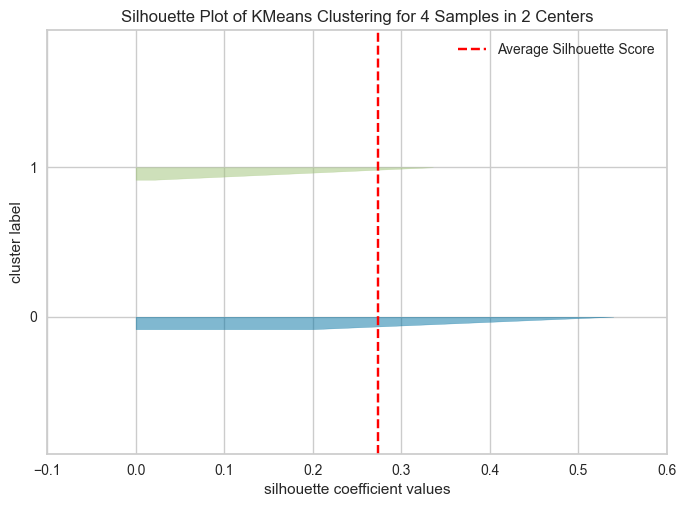

In [171]:
from yellowbrick.cluster import SilhouetteVisualizer

#fig, ax = plt.subplot(1,3,figsize=(10,8))
for i in [2]:
    k_m = KMeans(n_clusters=i, init=init_centroids,n_init=1)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(k_m, colors='yellowbrick')
    visualizer.fit(data)
    visualizer.show()


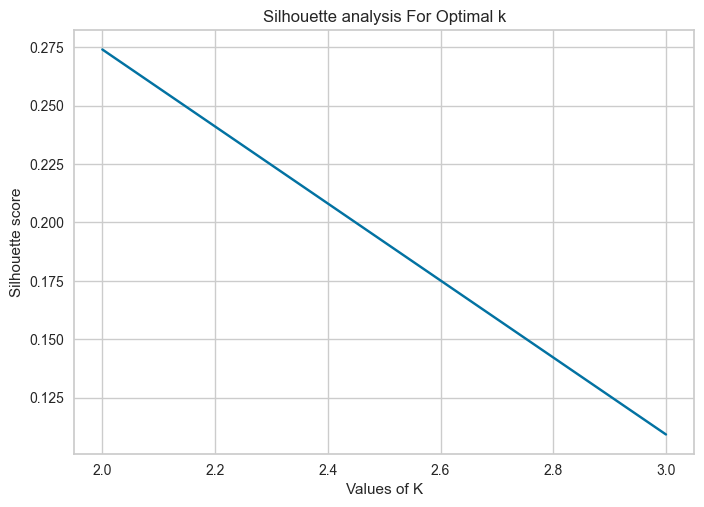

In [177]:
range_n_clusters = [2, 3]
silhouette_avg = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data)
    cluster_labels = kmeans.labels_

 # silhouette score
    silhouette_avg.append(silhouette_score(data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
"""1c) die Silhouetteoeffizente gibt eine Maßstab für die Qualität des Clusterings an, die unabhängig von der
Cluster- Anzahl ist
 Silhouettekoefizient liegt zwischen -1 und 1. Eine Negative Koeffizient weist darauf hin, dass die Datenpunkte
 ehr besser zu anderem Cluster zugeordnet werden."""
